# **YOLO_V8_Object_Detection for Efficient Object Detection and Count**

**Step 1: Install Required Libraries**

In [1]:
!pip install ultralytics -q
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
 

**Step 2: Load the Roboflow Dataset**

In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key="szYX2UE6vtX0SIGgaZLh")
project = rf.workspace("muhammadmoin-y1qrz").project("retail-store-axhqk")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.29, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Retail-Store-1 in yolov8:: 100%|██████████| 2138/2138 [00:00<00:00, 3718.81it/s]


**Step 3: Load and Configure the YOLO Model**

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")


100%|██████████| 6.23M/6.23M [00:00<00:00, 344MB/s]


**Step 4: Train the Model**

IMP : Update the train,test and val path at data.yaml file

In [7]:
# Train the model on the retail dataset
results = model.train(data="/content/Retail-Store-1/data.yaml", epochs=20, imgsz=640)

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Retail-Store-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 97.0MB/s]


Overriding model.yaml nc=80 with nc=27

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Retail-Store-1/train/labels... 856 images, 0 backgrounds, 0 corrupt: 100%|██████████| 856/856 [00:00<00:00, 1984.10it/s]

train: New cache created: /content/Retail-Store-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Retail-Store-1/valid/labels... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<00:00, 1362.90it/s]

val: New cache created: /content/Retail-Store-1/valid/labels.cache


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000323, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.59G      1.335      4.296      1.514         44        640: 100%|██████████| 54/54 [00:23<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         96        390     0.0366      0.156     0.0431     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.23G      1.345       3.47      1.519         54        640: 100%|██████████| 54/54 [00:19<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all         96        390      0.826      0.116      0.147      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.37G      1.364      2.911      1.573         37        640: 100%|██████████| 54/54 [00:20<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         96        390      0.772      0.148      0.264      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G      1.347      2.559      1.534         33        640: 100%|██████████| 54/54 [00:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         96        390       0.67       0.31      0.292      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G      1.335       2.29       1.53         26        640: 100%|██████████| 54/54 [00:18<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         96        390      0.676      0.334      0.377      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.24G      1.353      2.185      1.543         68        640: 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         96        390      0.772      0.309      0.404      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.24G      1.273      2.074      1.494         35        640: 100%|██████████| 54/54 [00:19<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         96        390      0.678      0.482      0.542      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.23G      1.237      1.935      1.471         29        640: 100%|██████████| 54/54 [00:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         96        390      0.771      0.454      0.538       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.26G      1.245      1.817      1.439         48        640: 100%|██████████| 54/54 [00:19<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         96        390      0.803      0.484      0.612      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G      1.207      1.721      1.423         84        640: 100%|██████████| 54/54 [00:19<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         96        390      0.754       0.52       0.64      0.446


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.53G       1.22      1.861       1.46         15        640: 100%|██████████| 54/54 [00:21<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         96        390      0.809      0.536       0.61      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.36G      1.185      1.746      1.425         42        640: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         96        390      0.793      0.516      0.678      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.148      1.645      1.409         20        640: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96        390       0.79      0.623      0.691      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.38G      1.128      1.561      1.384         31        640: 100%|██████████| 54/54 [00:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all         96        390      0.871      0.636      0.711      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.24G      1.124      1.499      1.372         28        640: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         96        390      0.808       0.62      0.698       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.36G      1.085      1.454      1.338         25        640: 100%|██████████| 54/54 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all         96        390      0.803      0.644      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.37G      1.095      1.419       1.34         25        640: 100%|██████████| 54/54 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         96        390      0.824      0.664      0.762      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.36G      1.064      1.347      1.323         20        640: 100%|██████████| 54/54 [00:18<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         96        390      0.831       0.67      0.772      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G       1.05      1.346      1.313         29        640: 100%|██████████| 54/54 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         96        390      0.896      0.664      0.784      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G      1.066      1.305      1.301         23        640: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         96        390      0.849      0.673       0.77      0.532



20 epochs completed in 0.126 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.3MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


                   all         96        390      0.897      0.664      0.784      0.538
                Apples          4          4          1      0.638      0.945      0.638
                   Bun          4          7      0.962          1      0.995      0.479
               Cabbage          2          2      0.847          1      0.995      0.821
            Cold Drink          1          1          1          0          0          0
             Dry Fruit          1          1          1          0      0.249     0.0995
                  Eggs          1          1      0.449          1      0.497      0.448
           Green Seeds          2          2      0.441          1      0.995      0.597
                  Milk          1          1          1          0      0.995      0.796
                   Oil          3          3       0.98          1      0.995      0.477
             Pineapple          2          2          1      0.896      0.995      0.696
                Snack

**Step 5: Validate the Model**

In [8]:
# Validate the model
metrics = model.val()  # uses the validation dataset configured in the YAML file
print("mAP 50-95:", metrics.box.map)
print("mAP 50:", metrics.box.map50)
print("mAP 75:", metrics.box.map75)


Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Retail-Store-1/valid/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]


                   all         96        390      0.896      0.664      0.784      0.538
                Apples          4          4          1      0.638      0.945      0.643
                   Bun          4          7      0.962          1      0.995      0.479
               Cabbage          2          2      0.847          1      0.995      0.821
            Cold Drink          1          1          1          0          0          0
             Dry Fruit          1          1          1          0      0.249     0.0995
                  Eggs          1          1      0.448          1      0.497      0.448
           Green Seeds          2          2      0.442          1      0.995      0.597
                  Milk          1          1          1          0      0.995      0.796
                   Oil          3          3      0.982          1      0.995      0.477
             Pineapple          2          2          1      0.897      0.995      0.696
                Snack

**Step 6: Predict and Count Objects in Images**

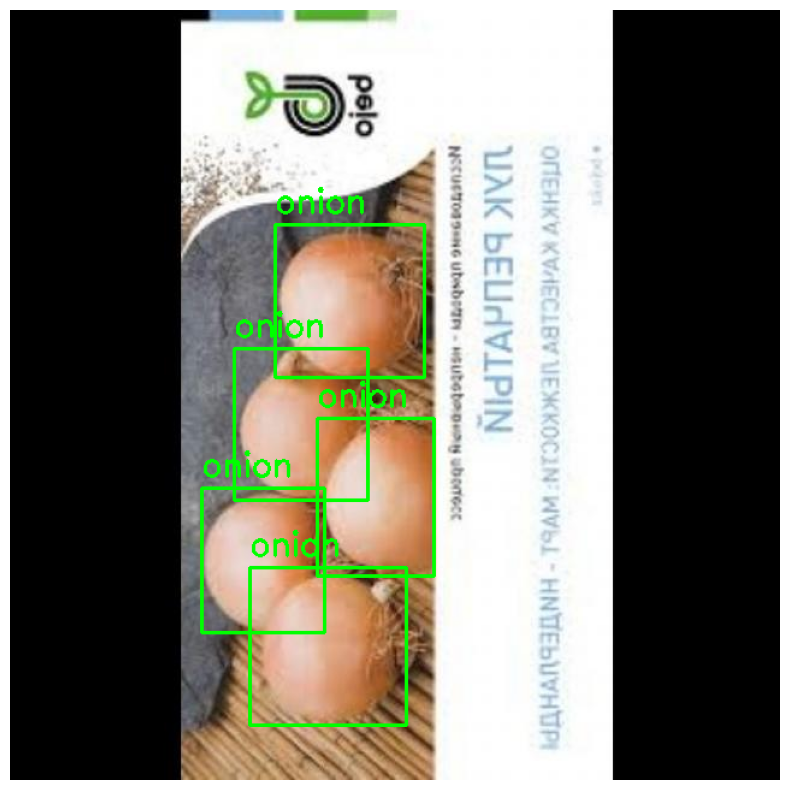

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/Retail-Store-1/test/images/-11_jpg.rf.80671bda8eacbd17b103ba4af0cc0199.jpg"
image = cv2.imread(image_path)

# Iterate over the predictions and draw bounding boxes
for prediction in predict2[0].boxes:
    # Get the coordinates and labels
    x1, y1, x2, y2 = map(int, prediction.xyxy[0])
    label = model.names[int(prediction.cls)]

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the label above the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [15]:
# Function to count objects in an image
def count_objects(results):
    object_counts = {}
    for result in results:
        for box in result.boxes:
            class_name = model.names[int(box.cls)]
            if class_name in object_counts:
                object_counts[class_name] += 1
            else:
                object_counts[class_name] = 1
    return object_counts

# Display the prediction results and count objects
image_results = model("/content/Retail-Store-1/test/images/-11_jpg.rf.80671bda8eacbd17b103ba4af0cc0199.jpg")
object_counts = count_objects(image_results)

print("Object Counts:", object_counts)



image 1/1 /content/Retail-Store-1/test/images/-11_jpg.rf.80671bda8eacbd17b103ba4af0cc0199.jpg: 640x640 5 onions, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Object Counts: {'onion': 5}
